In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
X = df.drop('class',axis=1)

In [6]:
y = df['class']

In [7]:
X = pd.get_dummies(X,drop_first=True)

In [8]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5,6]}

In [14]:
gb_model = GradientBoostingClassifier()

In [15]:
grid = GridSearchCV(gb_model,param_grid)

In [16]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [17]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [18]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [19]:
predictions = grid.predict(X_test)

In [20]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [21]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [23]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 9.86403138e-17, 0.00000000e+00, 0.00000000e+00,
       8.55142771e-17, 1.04902579e-03, 1.18312069e-05, 1.27734798e-06,
       1.35225239e-18, 1.25497484e-17, 0.00000000e+00, 8.41195397e-18,
       4.41785949e-17, 0.00000000e+00, 0.00000000e+00, 2.22085608e-08,
       2.31055039e-03, 5.36337746e-02, 1.84253604e-04, 2.10693520e-02,
       1.82499853e-02, 6.37384535e-05, 6.14744334e-01, 5.61116517e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.28013822e-02,
       1.03950811e-02, 0.00000000e+00, 6.23034070e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.25038795e-16, 0.00000000e+00, 6.96927281e-18, 0.00000000e+00,
       6.17243983e-04, 3.67811493e-06, 1.35970429e-01, 3.02822984e-03,
       2.04354273e-02, 6.21308869e-04, 6.12113083e-06, 4.95063766e-06,
       3.60117275e-05, 2.53703491e-04, 4.78019044e-02, 4.67578067e-05,
       0.00000000e+00, 0.00000000e+00, 4.59787330e-06, 0.00000000e+00,
      

In [24]:
feat_import = grid.best_estimator_.feature_importances_

In [25]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [26]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,9.864031e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,8.551428e-17
...,...
habitat_l,0.000000e+00
habitat_m,3.355085e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [27]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135970
bruises_t,0.053634
stalk-surface-below-ring_y,0.047802
spore-print-color_r,0.030495
...,...
gill-color_e,0.000000
veil-color_o,0.000000
gill-color_y,0.000000
gill-attachment_f,0.000000


In [28]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064704,0.0,0.0,0.000001,0.000305,0.614744


In [32]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [33]:
imp_feats.sort_values('Importance')

,Importance
stalk-shape_t,0.000617
stalk-surface-above-ring_k,0.000621
cap-surface_g,0.001049
ring-type_n,0.001260
ring-number_t,0.001632
cap-color_y,0.002311
stalk-color-below-ring_y,0.003025
stalk-root_e,0.003028
stalk-color-below-ring_w,0.003914
spore-print-color_u,0.004100


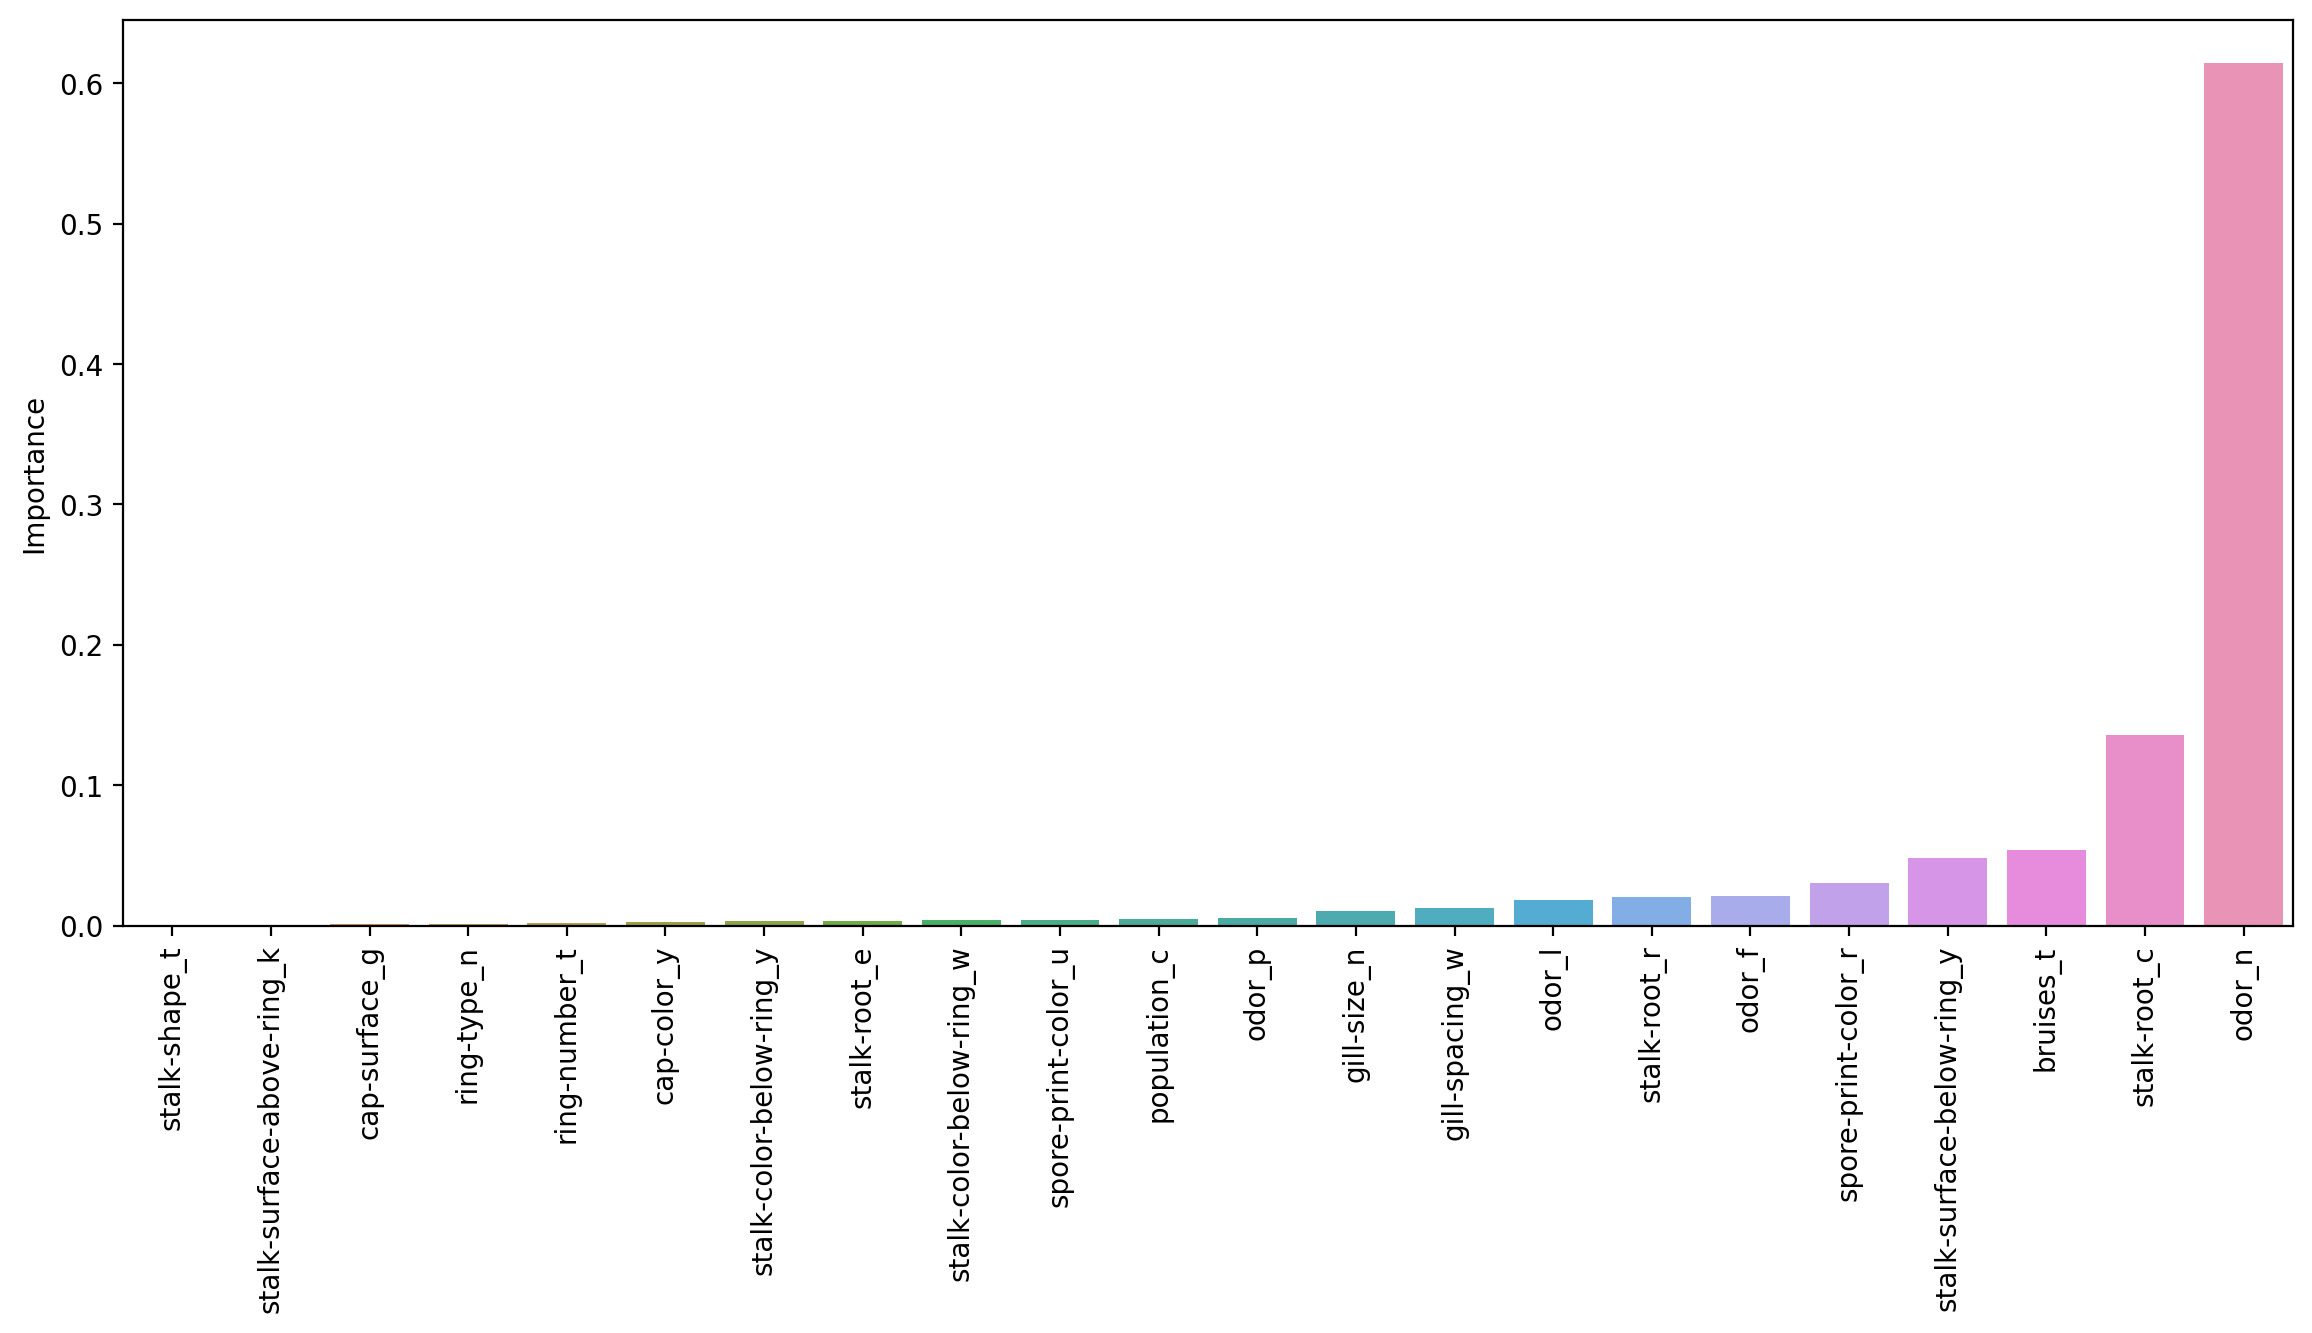

In [34]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);